# LOGISTIC REGRESSION on Algerian Forest Fire Dataset

Submitted By Rajan Kumar

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"C:\Users\Rajan\Downloads\Algerian_forest_fires_dataset_UPDATE.csv")
df.headad(10)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire
5,6,6,2012,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,fire
6,7,6,2012,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,fire
7,8,6,2012,30,73,15,0.0,86.6,12.1,38.3,5.6,13.5,7.1,fire
8,9,6,2012,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,not fire
9,10,6,2012,28,79,12,0.0,73.2,9.5,46.3,1.3,12.6,0.9,not fire


In [3]:
df.shape

(244, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4    RH          244 non-null    int64  
 5    Ws          244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  Classes      244 non-null    object 
dtypes: float64(7), int64(6), object(1)
memory usage: 26.8+ KB


In [6]:
#Adding new feature/column "Region"

df["Region"] = 0
for i in range(len(df)):
    if i >= 122:
        df["Region"][i] =1

In [7]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [8]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [9]:
df.columns=[co.strip() for co in df.columns]
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [13]:
df['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [15]:
df['Classes'] = df.Classes.str.strip()

In [16]:
df['Classes'].unique()

array(['not fire', 'fire'], dtype=object)

In [17]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [19]:
df['Classes'] = df['Classes'].map({'fire': 1, 'not fire': 0})

df.head(10)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0
5,6,6,2012,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,1,0
6,7,6,2012,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,1,0
7,8,6,2012,30,73,15,0.0,86.6,12.1,38.3,5.6,13.5,7.1,1,0
8,9,6,2012,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,0,0
9,10,6,2012,28,79,12,0.0,73.2,9.5,46.3,1.3,12.6,0.9,0,0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4   RH           244 non-null    int64  
 5   Ws           244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  Classes      244 non-null    int64  
 14  Region       244 non-null    int64  
dtypes: float64(7), int64(8)
memory usage: 28.7 KB


In [21]:
df['date'] = pd.to_datetime(df[['day','month','year']])
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,date
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0,2012-06-01
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0,2012-06-02
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0,2012-06-03
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0,2012-06-04
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0,2012-06-05


In [ ]:
df.drop(['day','month','year'],axis =1,inplace=True)

In [26]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,date
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0,2012-06-01
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0,2012-06-02
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0,2012-06-03
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0,2012-06-04
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0,2012-06-05


In [27]:
df.shape

(244, 13)

In [28]:
df.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes', 'Region', 'date'],
      dtype='object')

In [29]:
df.describe()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,49.288115,4.759836,16.673361,7.049180,0.565574,0.500000
std,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,47.619662,4.154628,14.201648,7.428366,0.496700,0.501028
min,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000,0.000000
25%,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,13.275000,1.400000,6.000000,0.700000,0.000000,0.000000
50%,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,33.100000,3.500000,12.450000,4.450000,1.000000,0.500000
75%,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,68.150000,7.300000,22.525000,11.375000,1.000000,1.000000
max,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000,1.000000


In [31]:
df.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.370498,0.605971,0.456415,0.566839,0.518119,0.273496
RH,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.220330,-0.688268,-0.349685,-0.580457,-0.435023,-0.406424
Ws,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.076245,0.012245,0.030303,0.033957,-0.066529,-0.176829
Rain,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.296804,-0.347862,-0.299409,-0.324755,-0.379449,-0.041080
FFMC,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.503910,0.740751,0.590251,0.691430,0.770114,0.224680
DMC,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.875358,0.678355,0.982206,0.875191,0.584188,0.191094
DC,0.370498,-0.220330,0.076245,-0.296804,0.503910,0.875358,1.000000,0.503919,0.941672,0.737041,0.507122,-0.081489
ISI,0.605971,-0.688268,0.012245,-0.347862,0.740751,0.678355,0.503919,1.000000,0.641351,0.922422,0.736142,0.266298
BUI,0.456415,-0.349685,0.030303,-0.299409,0.590251,0.982206,0.941672,0.641351,1.000000,0.856912,0.584545,0.087996
FWI,0.566839,-0.580457,0.033957,-0.324755,0.691430,0.875191,0.737041,0.922422,0.856912,1.000000,0.719407,0.198474


<AxesSubplot:>

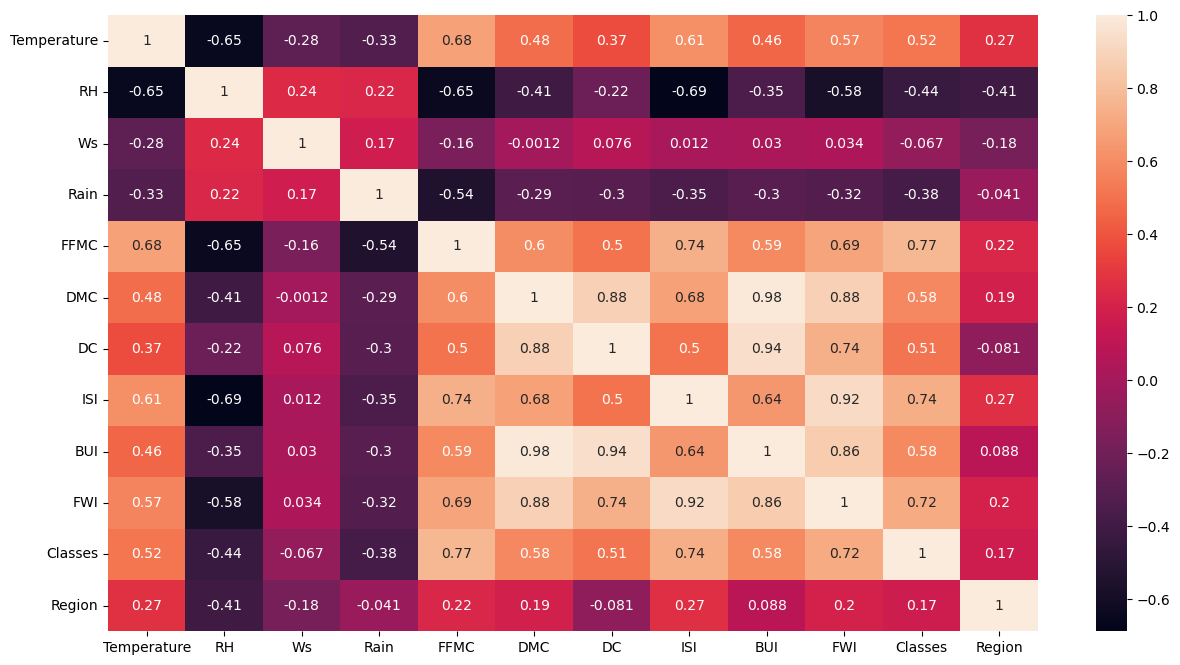

In [33]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)

In [35]:
df.duplicated().sum()

0

In [36]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
numeric_features

['Temperature',
 'RH',
 'Ws',
 'Rain',
 'FFMC',
 'DMC',
 'DC',
 'ISI',
 'BUI',
 'FWI',
 'Classes',
 'Region',
 'date']

In [37]:
len(numeric_features)
#Here we have 13 Numeric features also termed here as Independent features

13

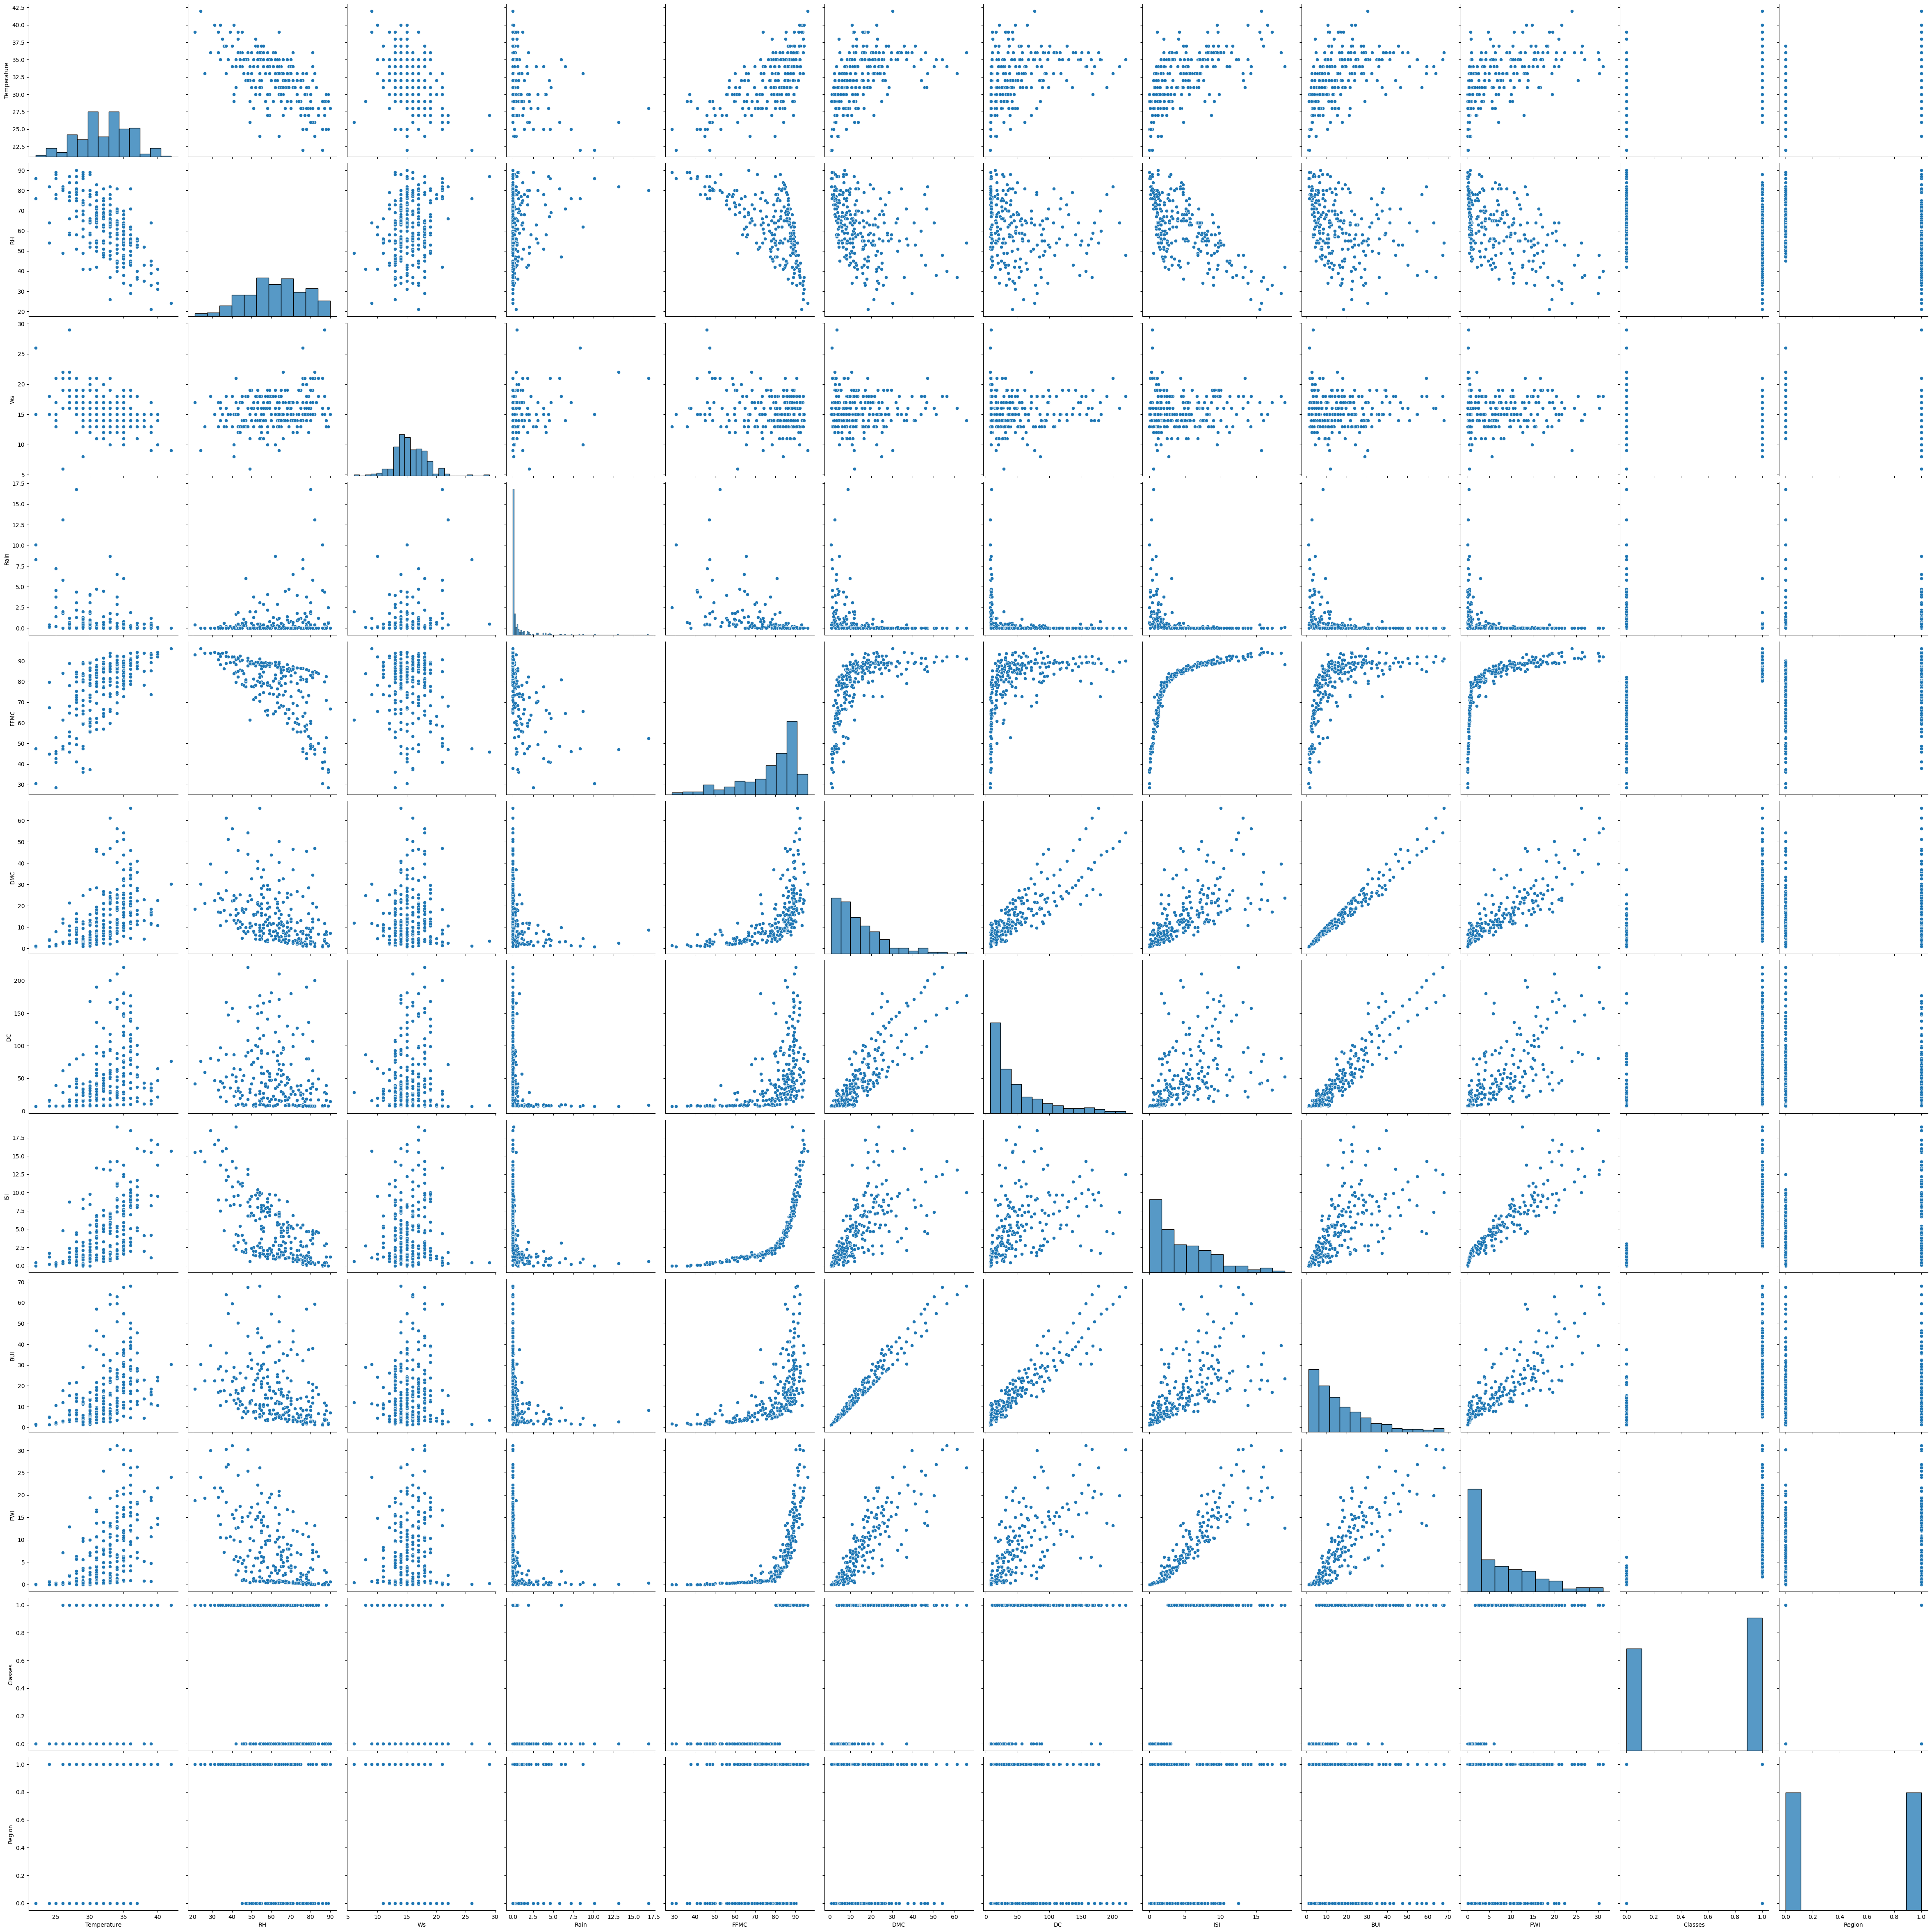

In [38]:
sns.pairplot(df,height=4)

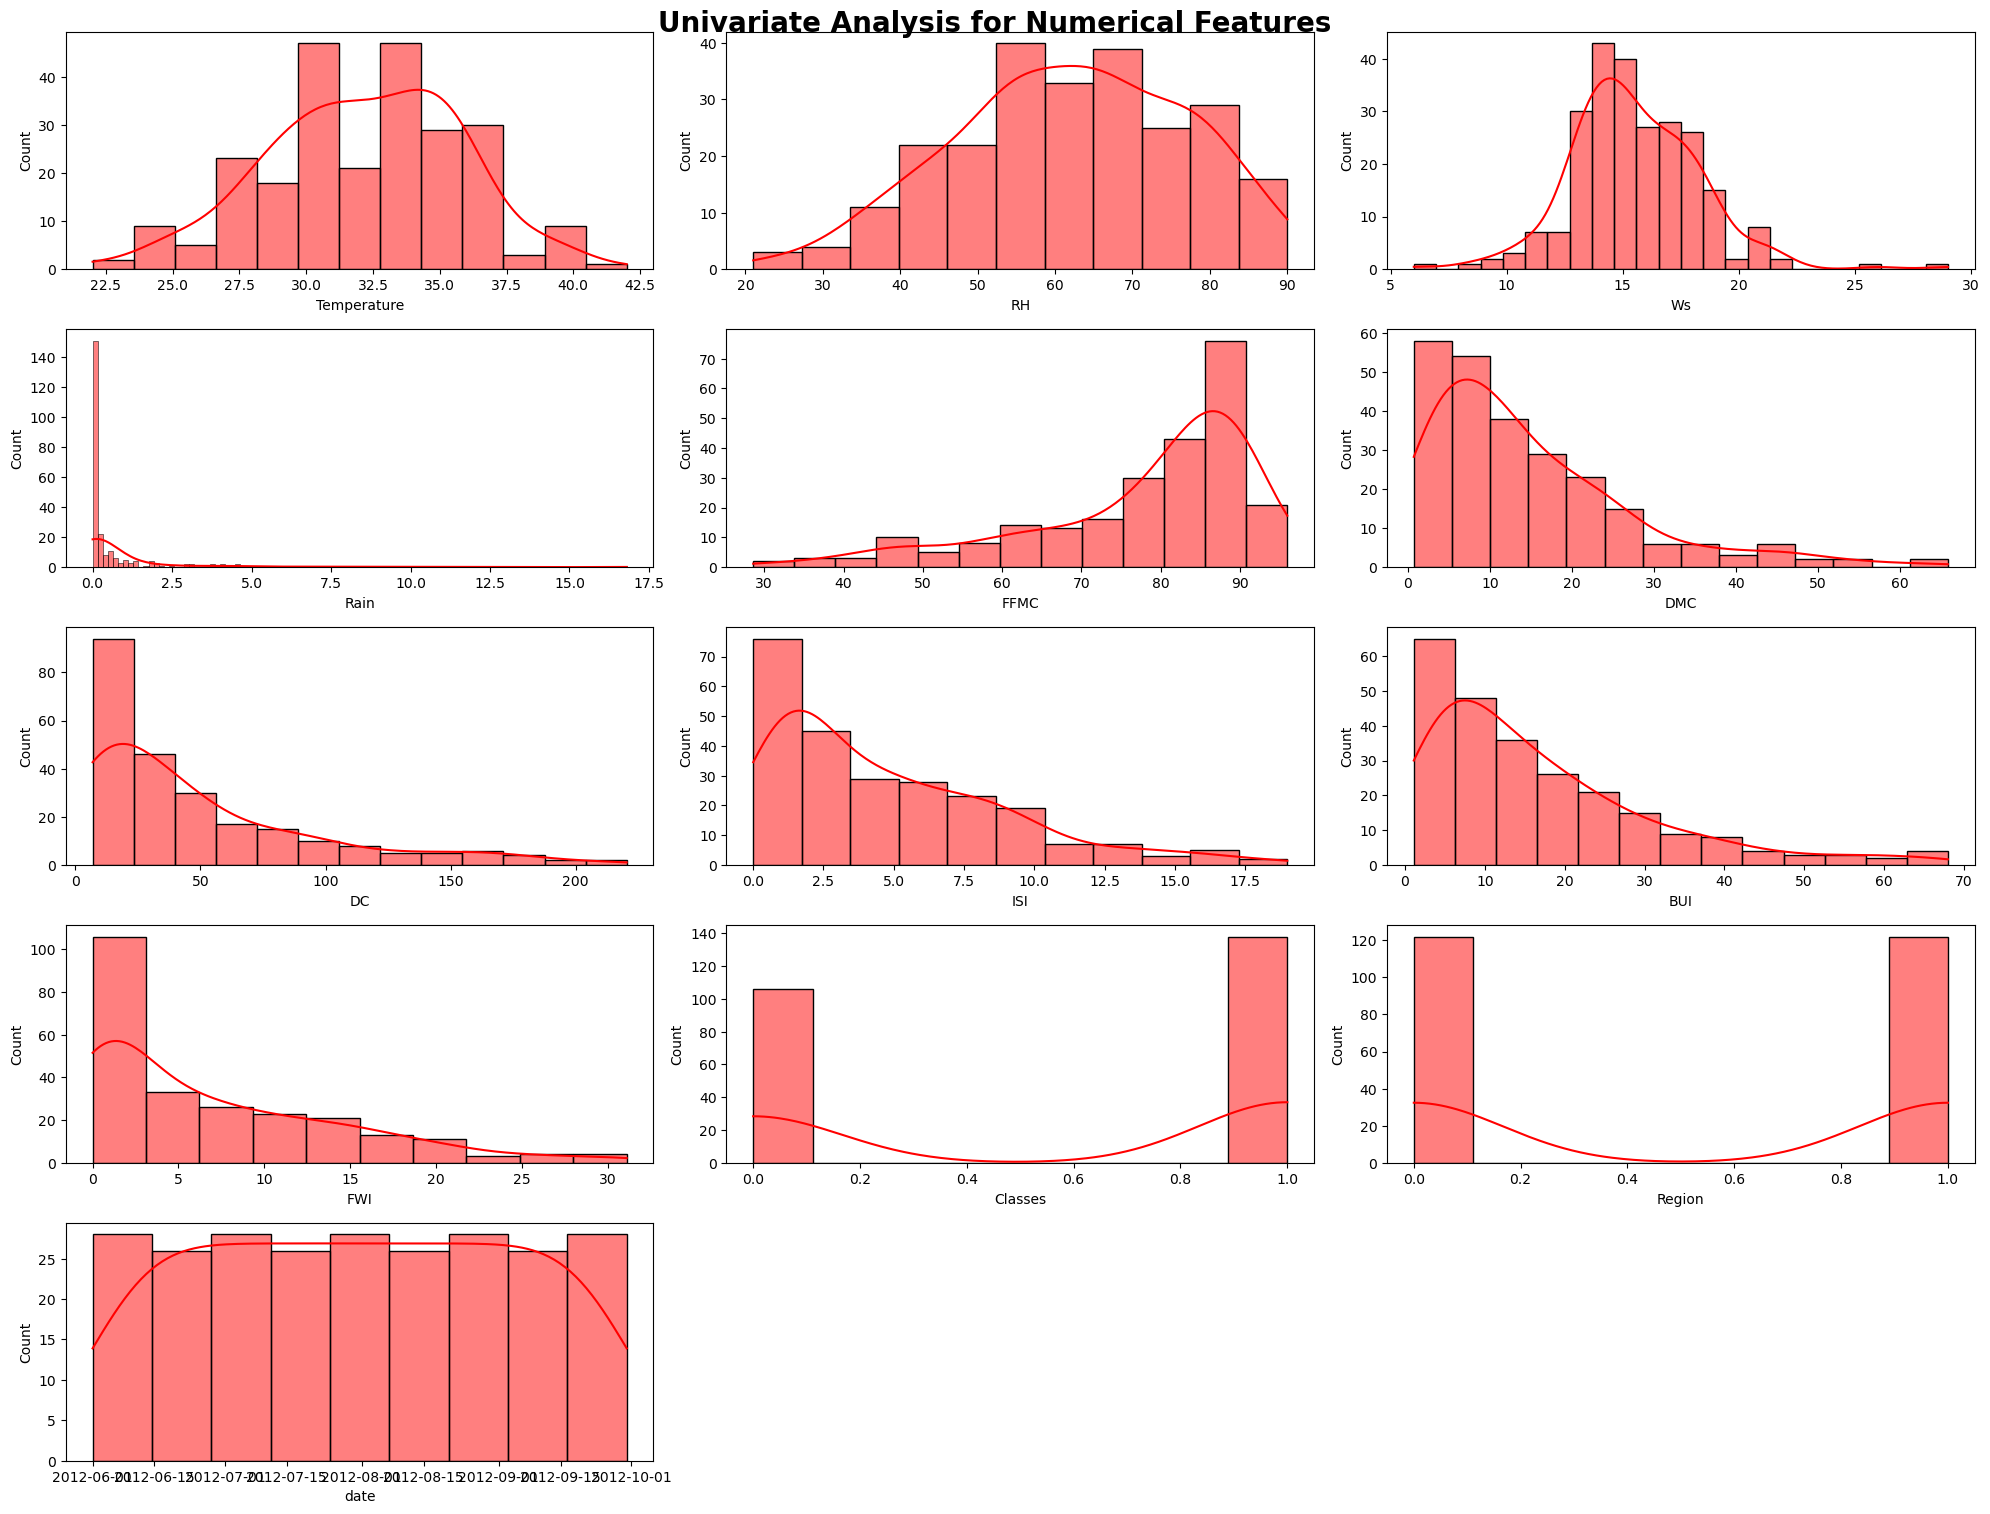

In [44]:
plt.figure(figsize=(20,18))
plt.suptitle('Univariate Analysis for Numerical Features', fontsize=20,fontweight = 'bold')

for i in range(0, len(numeric_features)):
    plt.subplot(6,3,i+1)
    sns.histplot(x =df[numeric_features[i]],kde=True,color='r')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

<AxesSubplot:xlabel='Classes', ylabel='count'>

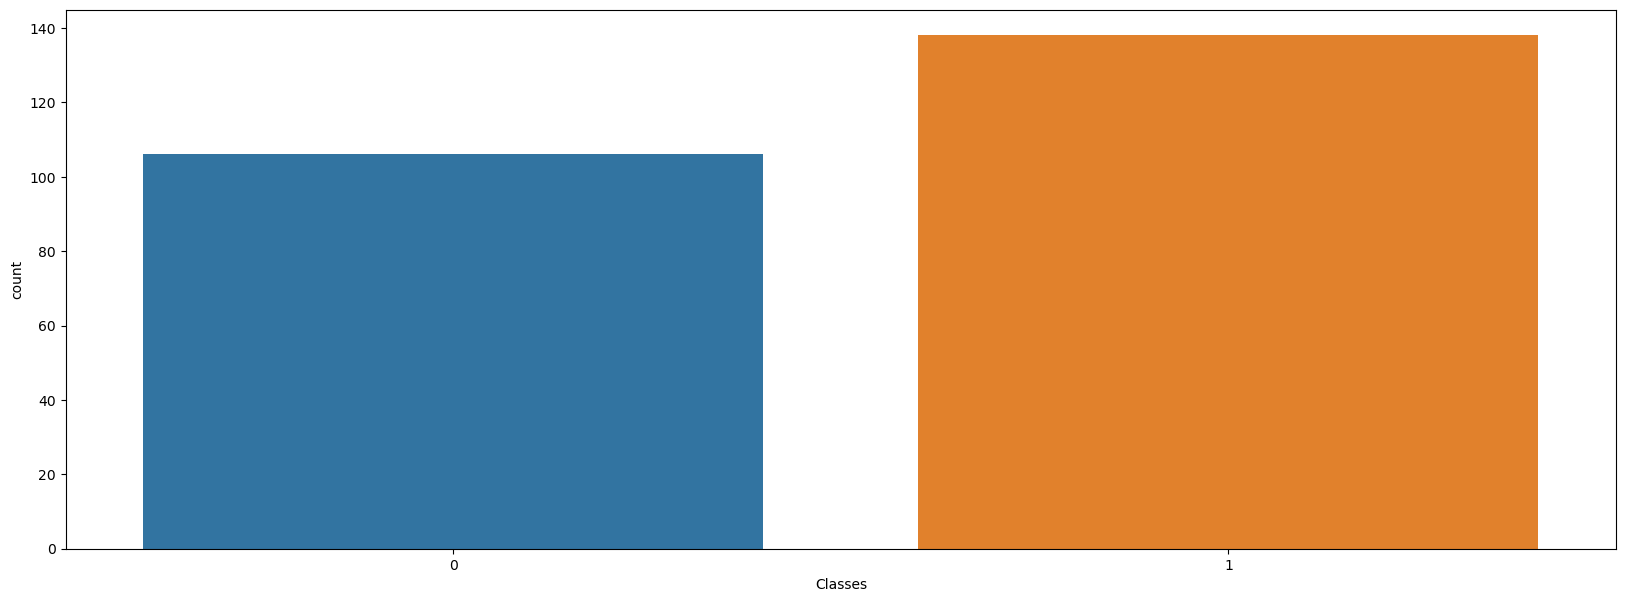

In [59]:
plt.figure(figsize=(20, 7))
sns.countplot(data=df, x='Classes')

<AxesSubplot:>

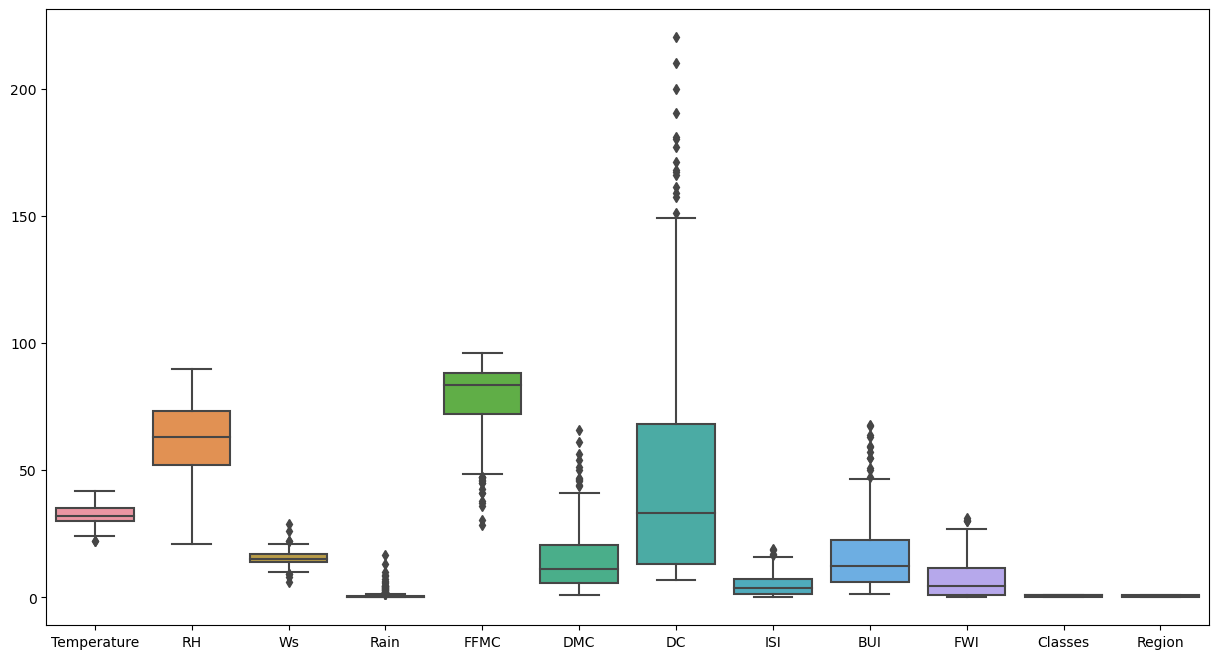

In [45]:
#Checking for Outliers
plt.figure(figsize=(15,8))
sns.boxplot(data=df)

In [52]:
#Unique data
for column in df.columns:
  print("-"*20)
  print("[" + column + "]")
  print(np.sort(df[column].unique()))
  print("-*"*10)
  print()

--------------------
[Temperature]
[22 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 42]
-*-*-*-*-*-*-*-*-*-*

--------------------
[RH]
[21 24 26 29 31 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75
 76 77 78 79 80 81 82 83 84 86 87 88 89 90]
-*-*-*-*-*-*-*-*-*-*

--------------------
[Ws]
[ 6  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 26 29]
-*-*-*-*-*-*-*-*-*-*

--------------------
[Rain]
[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3
  1.4  1.7  1.8  1.9  2.   2.2  2.5  2.9  3.1  3.8  4.   4.1  4.4  4.5
  4.6  4.7  5.8  6.   6.5  7.2  8.3  8.7 10.1 13.1 16.8]
-*-*-*-*-*-*-*-*-*-*

--------------------
[FFMC]
[28.6 30.5 36.1 37.3 37.9 40.9 41.1 42.6 44.9 45.  45.9 46.  47.1 47.4
 48.6 48.7 49.4 50.  52.5 52.9 53.4 55.7 56.1 56.9 57.1 58.5 59.  59.5
 59.8 59.9 60.2 60.7 61.3 62.  62.2 63.1 63.7 64.4 64.5 64.6 64.8 65.5
 65.7 66.1 66.6 66.8 67.3 68.2 68.3 68.4 69.6 69.7 7

In [60]:
X = df.iloc[:,[0,1,2,3,4,5,6,7,8,9]]
y = df['Classes']

In [61]:
X

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5
...,...,...,...,...,...,...,...,...,...,...
239,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5
240,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0
241,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2
242,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7


In [62]:
y

0      0
1      0
2      0
3      0
4      0
      ..
239    1
240    0
241    0
242    0
243    0
Name: Classes, Length: 244, dtype: int64

In [65]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)

In [67]:
X_train.shape

(163, 10)

In [68]:
y_train.shape

(163,)

In [69]:
X_test.shape

(81, 10)

In [70]:
y_test.shape

(81,)

In [71]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler

StandardScaler()

In [72]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [73]:
X_train

array([[ 0.00487747, -0.60257784, -1.68484146, ..., -0.80014076,
        -0.47763563, -0.8196431 ],
       [ 0.53489642,  0.14460201, -0.93856657, ...,  0.16132584,
        -0.3471914 , -0.08219052],
       [-0.260132  , -1.41768313,  2.04653297, ...,  2.13233237,
         0.09906517,  1.36540157],
       ...,
       [-1.85018883,  0.89178186,  0.5539832 , ..., -1.04050741,
        -1.01314351, -0.90158227],
       [ 0.26988695, -0.39880152,  0.18084575, ...,  0.52187581,
        -0.058841  ,  0.31384882],
       [-0.52514147,  0.9597073 ,  2.04653297, ..., -0.82417743,
        -0.9719506 , -0.87426921]])

In [74]:
X_test

array([[-4.74644453e-01,  2.63611698e-01, -1.58418828e-01,
        -3.79941323e-01,  4.94929975e-01, -5.55412949e-02,
         3.16450964e-01,  1.16557214e-01,  1.04365998e-01,
         8.64078289e-02],
       [ 1.35612701e-01, -4.05747159e-01, -8.16466268e-01,
        -3.79941323e-01,  6.07329960e-01, -4.24018114e-01,
        -4.45183001e-01,  2.88214202e-01, -4.50217151e-01,
        -7.26611288e-02],
       [ 1.35612701e-01, -8.07362473e-01,  1.70604892e-01,
        -3.79941323e-01,  5.62369966e-01, -5.95402682e-01,
        -7.35656015e-01,  3.86303910e-01, -6.82542525e-01,
        -1.78707101e-01],
       [ 7.45869854e-01, -4.72683044e-01,  4.99628612e-01,
        -1.35693330e-02,  7.86337344e-03,  5.01458549e-01,
         2.26971044e+00, -6.19115592e-01,  1.02617312e+00,
        -2.44985833e-01],
       [ 2.27151274e+00, -1.27591367e+00, -1.80353743e+00,
        -3.06666925e-01,  8.92076589e-01,  6.64273887e-01,
         3.46184422e-01,  1.04840944e+00,  5.46533644e-01,
         9.

In [75]:
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.87473544, -0.33247844,  0.88999047, ..., -0.83447856,
        -0.93655635, -0.88345707],
       [-0.87473544, -0.0631847 , -0.89291326, ..., -0.90683562,
        -0.9012768 , -0.89694665],
       [-1.70200461,  1.35060746,  2.31631345, ..., -1.07566876,
        -0.98594772, -0.9374154 ],
       ...,
       [-1.42624822,  1.68722464,  4.81237868, ..., -1.05154974,
        -0.93655635, -0.92392582],
       [-2.25351739, -0.53444875,  0.88999047, ..., -0.73800248,
        -0.81660589, -0.85647791],
       [-2.25351739,  0.13878561, -0.17975177, ..., -0.85859758,
        -0.83777362, -0.88345707]])

<AxesSubplot:>

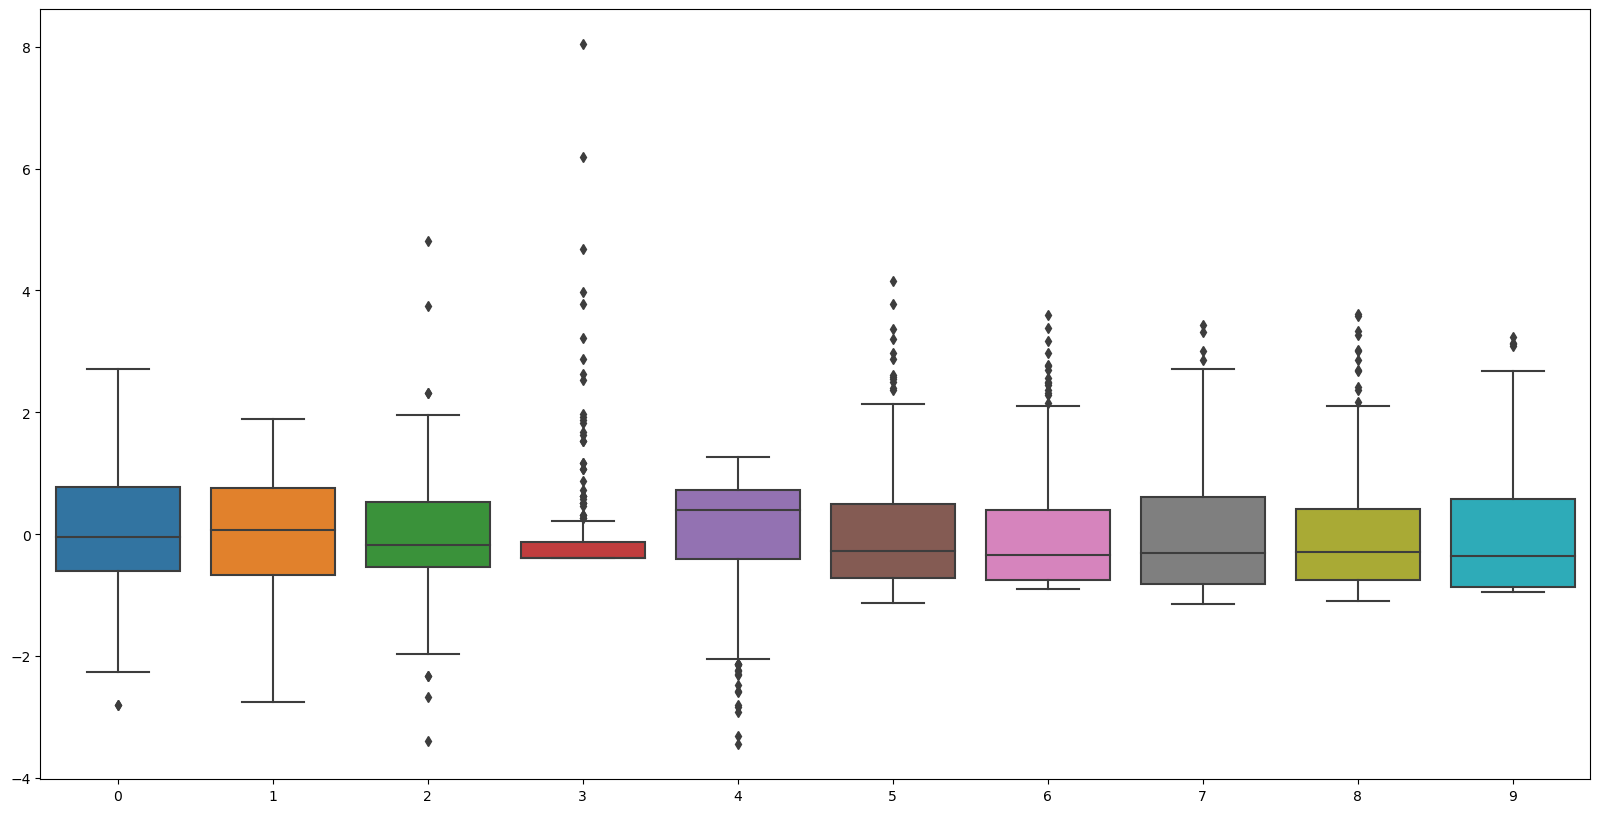

In [76]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=X_scaled)

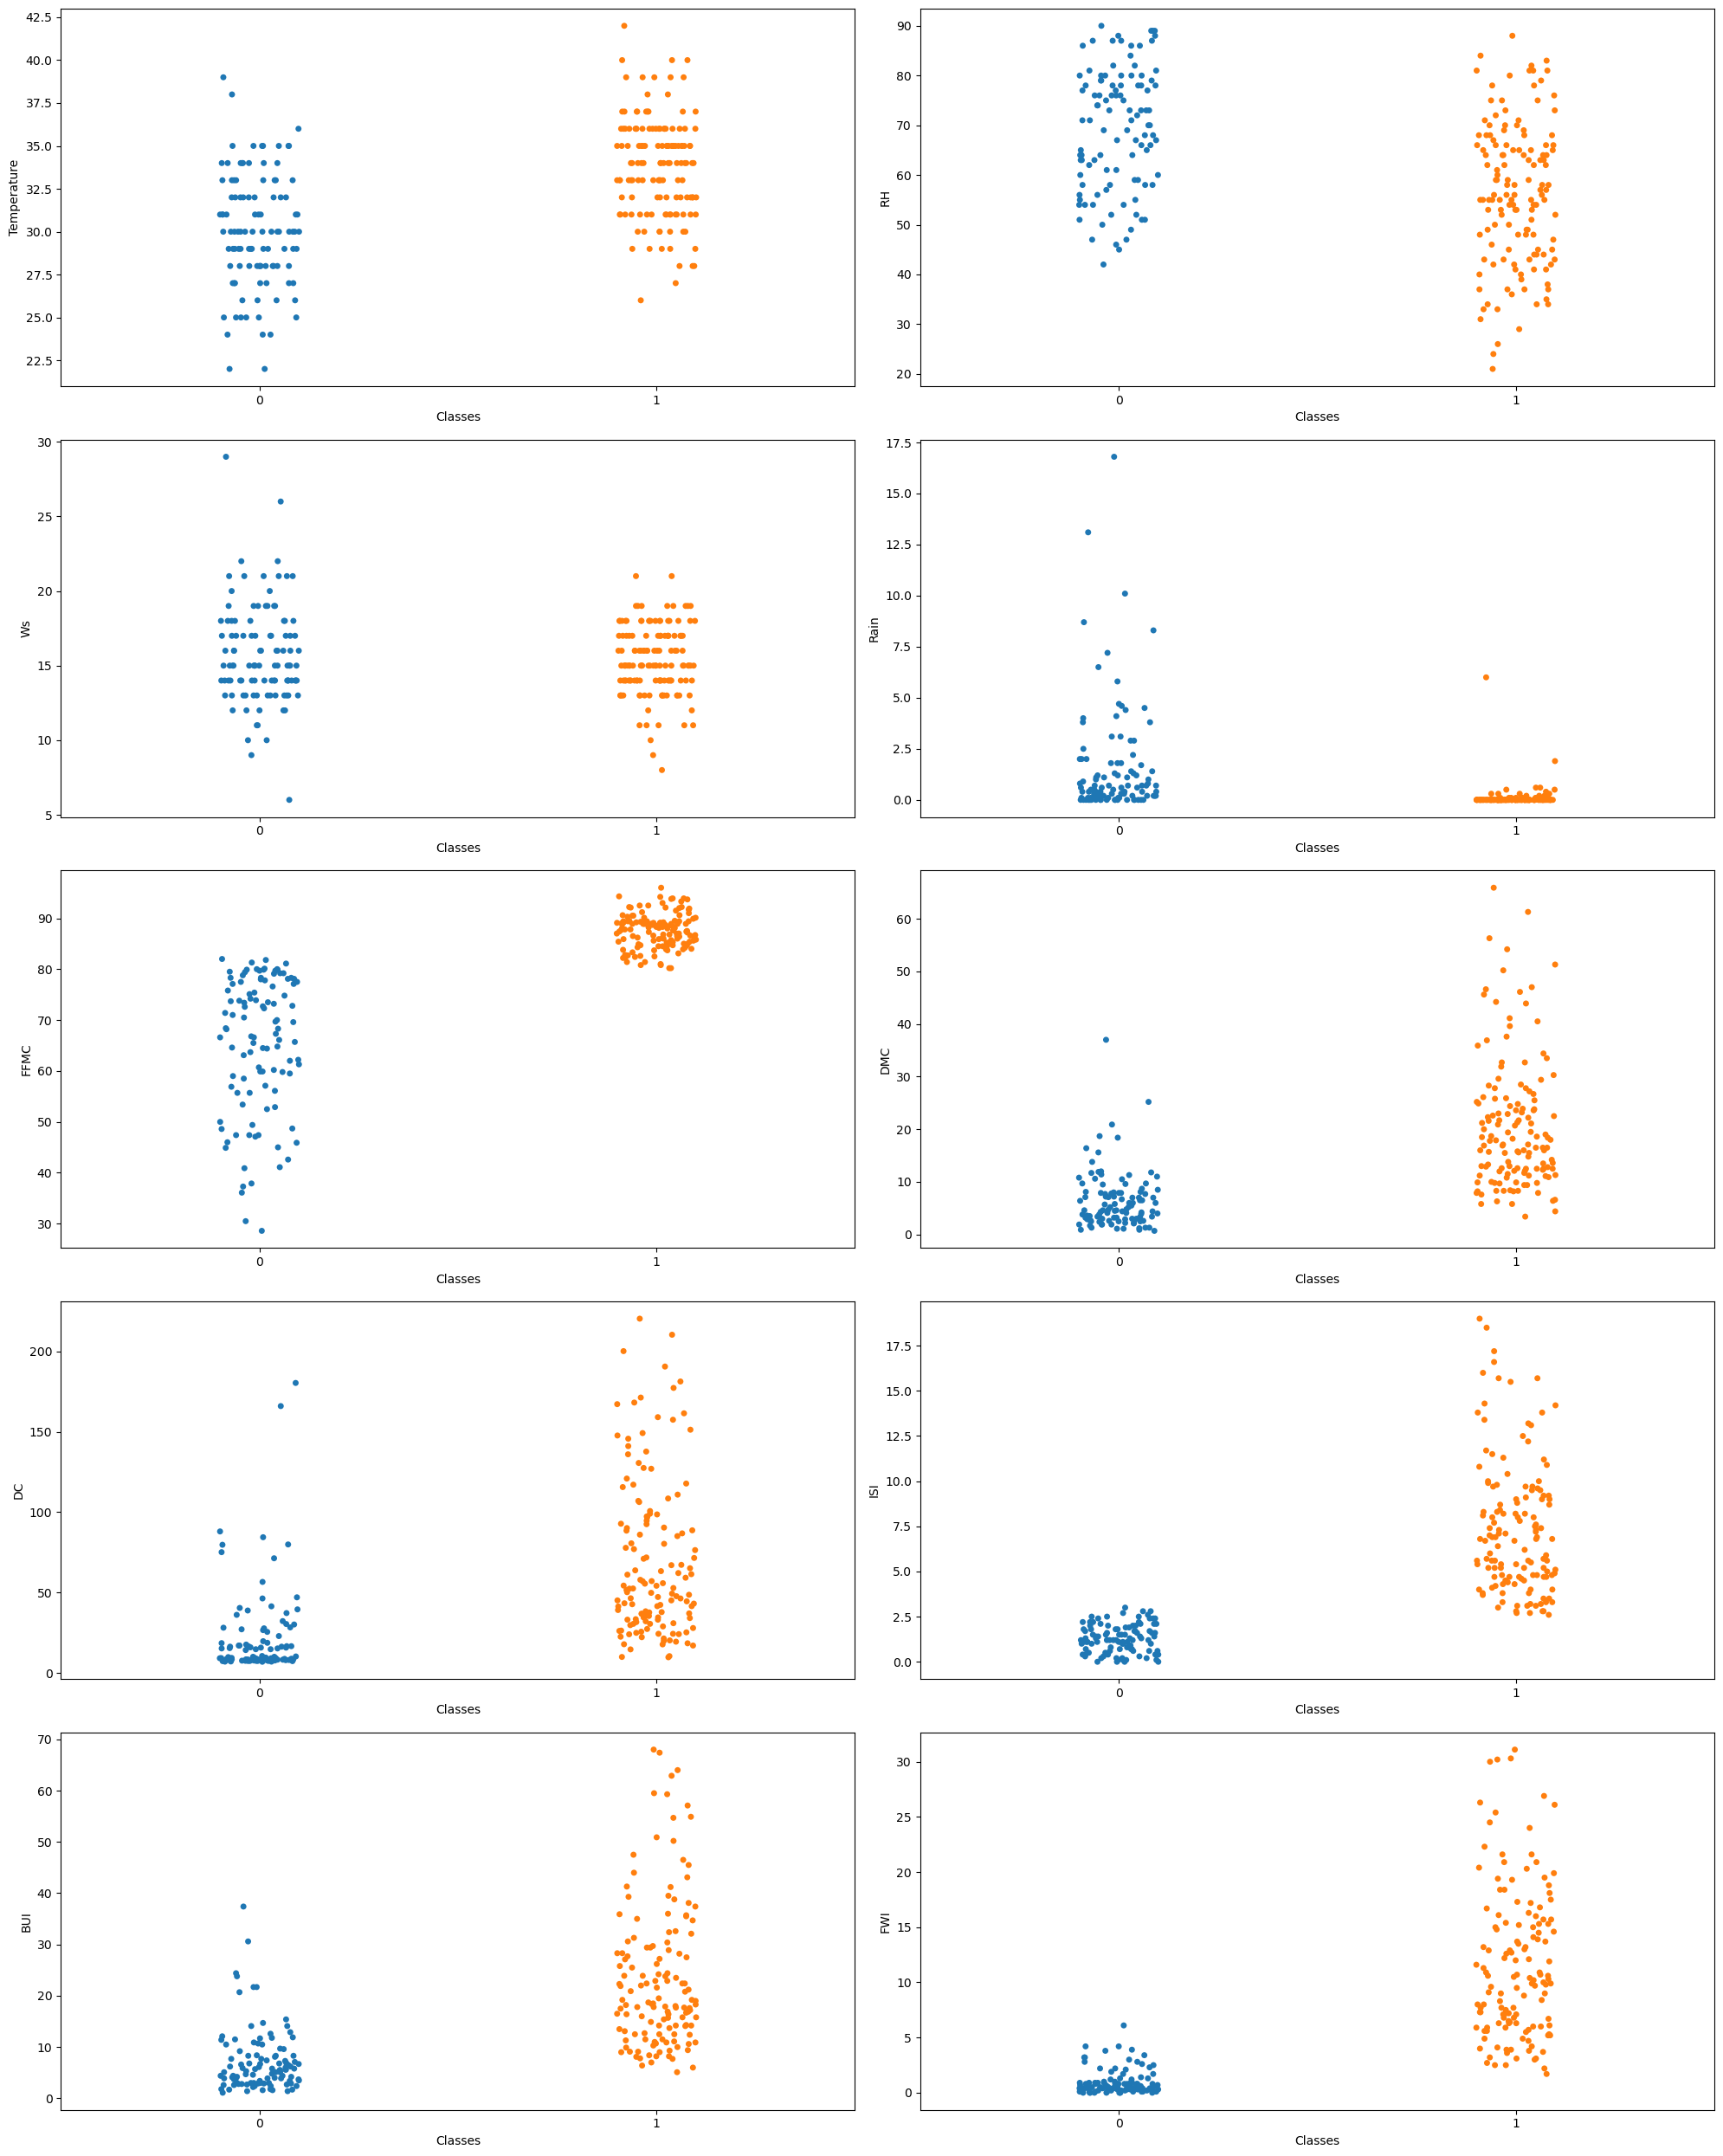

In [77]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in X:
  ax = plt.subplot(5, 2, plotnumber)
  sns.stripplot(y=X[column], x=y)
  plotnumber += 1
plt.tight_layout()

In [78]:

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

In [80]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

#let's check the values
vif

,vif,Features
0,2.319892,Temperature
1,2.763251,RH
2,1.281528,Ws
3,1.539725,Rain
4,4.109607,FFMC
5,76.208113,DMC
6,24.548675,DC
7,22.931108,ISI
8,170.409228,BUI
9,40.407207,FWI


In [83]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [84]:
log_reg.fit(X_train,y_train)

LogisticRegression()

In [87]:
y_pred = log_reg.predict(X_test)
y_pred

array([1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1], dtype=int64)

In [91]:
#Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[28,  0],
       [ 6, 47]], dtype=int64)

In [92]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [93]:
#Formulae for accuracy

Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.9259259259259259

In [94]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

1.0

In [95]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

0.8235294117647058

In [96]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.9032258064516129

In [97]:
# Area Under Curve
areauc = roc_auc_score(y_test, y_pred)
areauc

0.9433962264150944

In [98]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

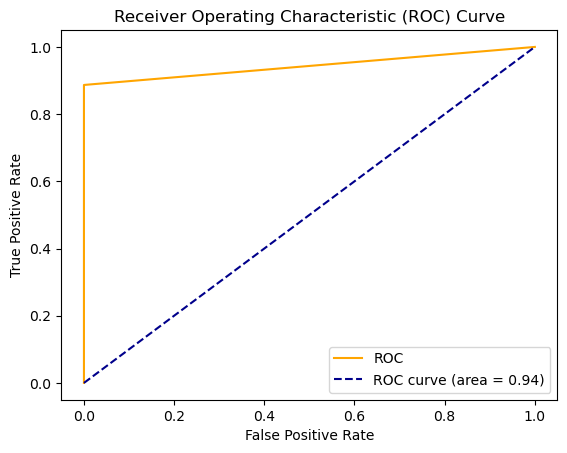

In [100]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % areauc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()